<div style="background-color: #3498db; padding: 20px;">
    <h1 style="font-size: 100px; color: #ffffff;">Artificial Neural Network</h1>
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick

In [2]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

C:\Users\rasou\anaconda_2024\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# <span style="color:#3498db">Developing an ANN Classification Model for Heart Disease Prediction</span>

The Heart Disease UCI dataset offers insights into predicting heart disease based on various medical factors. Below are the key steps to craft an effective Artificial Neural Network (ANN) classification model using PyTorch:

## <span style="color:#27ae60">1. Data Loading and Preprocessing:</span>
- **Load Data:** Begin by loading the dataset and comprehensively understand its structure and features.
- **Preprocessing:** Address missing values by employing suitable techniques. Encode categorical variables via methods like one-hot encoding for numerical conversion. Normalize numerical features to ensure uniformity in scale, facilitating better model convergence.

## <span style="color:#27ae60">2. Train-Test Split:</span>
- **Data Segmentation:** Segment the dataset into training and testing sets. Typically, allocate 70-80% for training and the rest for testing to gauge model performance on unseen data.

## <span style="color:#27ae60">3. Model Definition:</span>
- **Architectural Blueprint:** Define the neural network architecture, specifying the number of layers and neurons per layer.
- **Activation Functions:** Opt for appropriate activation functions (e.g., ReLU, sigmoid) for hidden layers.
- **Input and Output Layer Design:** Determine the input node count based on features and define the output layer with a suitable activation function, like sigmoid for binary classification.

## <span style="color:#27ae60">4. Model Training:</span>
- **Loss Function Selection:** Choose an apt loss function, such as binary cross-entropy loss for binary classification tasks.
- **Optimizer Configuration:** Opt for an optimizer (e.g., Adam, SGD) and set its learning rate.
- **Iterative Training:** Train the model over multiple epochs, refining parameters to minimize loss. Monitor training progress and fine-tune hyperparameters as needed for enhanced performance.

## <span style="color:#27ae60">5. Model Evaluation:</span>
- **Performance Assessment:** Evaluate the trained model on the testing dataset to gauge its efficacy.
- **Metrics Computation:** Calculate performance metrics like accuracy, precision, recall, and F1-score to quantify model effectiveness.
- **Visual Insights:** Utilize visualization tools such as confusion matrices or ROC curves for deeper performance analysis across different thresholds.

## <span style="color:#27ae60">6. Model Fine-Tuning (Optional):</span>
- **Architectural Experimentation:** Explore diverse architectures, activation functions, or optimization algorithms to boost model efficacy.
- **Hyperparameter Tuning:** Conduct hyperparameter tuning through methods like grid search or random search for optimal parameter combinations.

## <span style="color:#27ae60">7. Deployment:</span>
- **Model Integration:** Upon satisfactory performance, deploy the model for real-world inference.
- **Predictive Utilization:** Employ the trained model to make predictions on new data or integrate it into applications for automated decision-making.

Through these meticulously crafted steps, one can craft an impactful ANN classification model using PyTorch for heart disease prediction, ensuring robust performance and reliable insights.


# <span style="color:#3498db">Heart Disease UCI Dataset</span>

<div style="background-color:#e8f5e9; padding: 10px; border-radius: 5px;">

**<span style="color:#e74c3c">Description:</span>**  
The Heart Disease dataset contains medical information about patients, with the goal of predicting the presence of heart disease.

**<span style="color:#e74c3c">Categorical Variables:</span>**  
- `id` Unique id for each patient
- `dataset` Place of study
- `sex` (1 = male; 0 = female)
- `cp` (chest pain type: 0-3)
- `fbs` (fasting blood sugar > 120 mg/dl: 1 = true; 0 = false)
- `restecg` (resting electrocardiographic results: 0-2)
- `exang` (exercise induced angina: 1 = yes; 0 = no)
- `thal` (thalassemia: 0-3)
- `slope` The slope of the peak exercise ST segment


**<span style="color:#e74c3c">Numerical Variables:</span>**  
- `age` (years)
- `trestbps` (resting blood pressure)
- `chol` (serum cholesterol in mg/dl)
- `thalch` (maximum heart rate achieved)
- `oldpeak` (ST depression induced by exercise relative to rest)
- `ca` number of major vessels (0-3) colored by fluoroscopy



**<span style="color:#e74c3c">Target Variable:</span>**  
- `num` The predicted attribute, target [0=no heart disease; 1,2,3,4 = stages of heart disease ]

<p>To see more about this data set <a href="https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data" target="_blank">click here</a>.</p>



</div>


## <span style="color:#27ae60">1. Data Loading and Preprocessing:</span>

In [4]:
df = pd.read_csv( r'C:\D\Python-Projects\Machine-Learning\myfile\heart_disease_uci.csv' )
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum().to_frame().T)


Missing values in the dataset:
   id  age  sex  dataset  cp  trestbps  chol  fbs  restecg  thalch  exang  \
0   0    0    0        0   0        59    30   90        2      55     55   

   oldpeak  slope   ca  thal  num  
0       62    309  611   486    0  


<div style="background-color:#f0f8ff; padding: 20px; border: 2px solid #b0c4de; border-radius: 10px;">

### &#9881; <span style="color:#4682b4;">Data Cleaning Strategy</span>

To handle the missing values in our dataset, we will employ a combination of strategies tailored to the characteristics of each column. Here’s the plan:

1. **Categorical Columns**:
   - **`slope`** and **`thal`**: These columns contain categorical data. We will define a new category labeled as <code>Unknown</code> and fill the null values with this category.

2. **Continuous Columns**:
   - **`thalach`**, **`trestbps`**, **`chol`**, and **`oldpeak`**: For these continuous variables, we will fill the null values with the average (mean) of the column.

3. **Columns with Minimal Null Values**:
   - **`restecg`**: This column has only 2 null values. We will drop these rows to maintain data integrity.

4. **Columns with Most Frequent Value**:
   - **`exang`** , **`ca`** and **`fbs`**: We will fill the null values with the most frequent value (mode) in these columns.

<span style="color:#d9534f;">**Note:**</span> There are various strategies to handle missing values. For instance, it can be effective to fill the null values of a column based on the value in another column. However, for simplicity and clarity, we are using the aforementioned methods.

</div>


In [6]:
# Replace null values in 'thal' and 'slope' columns with a new category label 'Unknown'
df['thal'].fillna('Unknown', inplace=True)
df['slope'].fillna('Unknown', inplace=True)

<div style="background-color:#f8d7da; padding: 15px; border: 2px solid #f5c6cb; border-radius: 5px;">
    <p style="color:#721c24; font-size:16px;">
        &#9888; <strong>Attention:</strong> Although the histogram of the <code>chol</code> column in our dataset shows two distinct peaks, indicating a bimodal distribution, and replacing the null values with the average may not be the most accurate approach due to the average falling in an interval with sparse data, we will proceed with this method for simplicity. This straightforward imputation strategy allows us to maintain consistency and proceed with our analysis without introducing additional complexity.
    </p>
</div>


C:\Users\rasou\anaconda_2024\envs\pytorchenv\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\rasou\anaconda_2024\envs\pytorchenv\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


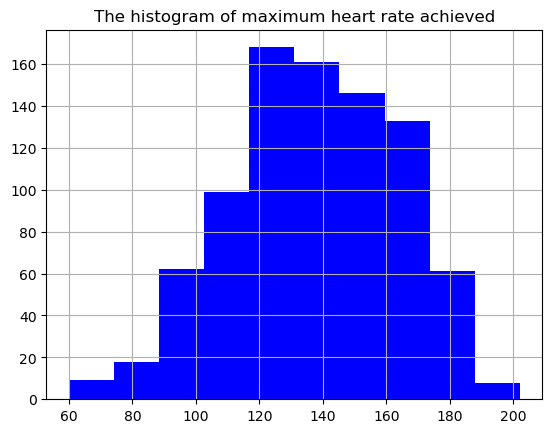

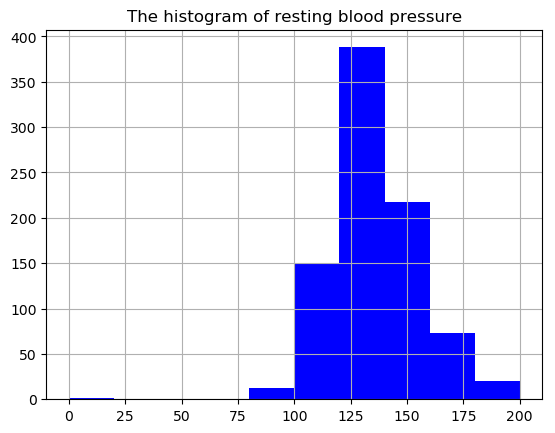

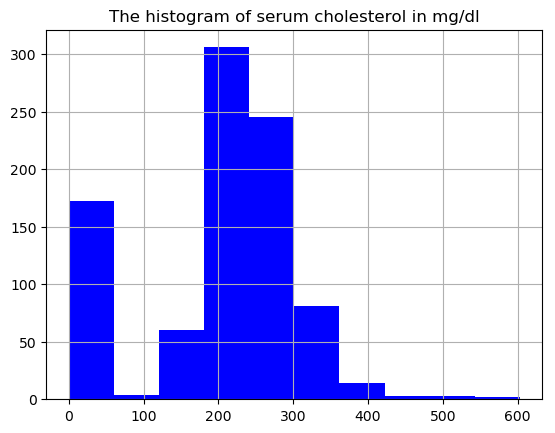

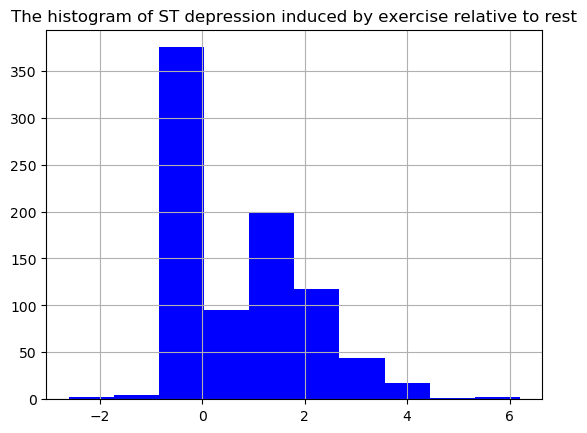

In [7]:
dict_columns = {'thalch'   : 'maximum heart rate achieved' , \
                'trestbps' : 'resting blood pressure'      , \
                'chol'     : 'serum cholesterol in mg/dl'  , \
                'oldpeak'  : 'ST depression induced by exercise relative to rest'}
for column , description in dict_columns.items():
    plt.hist( df[column] , color = 'blue')
    plt.title(f'The histogram of {description}')
    plt.grid()
    plt.show()
    # Fill null values in thalch with the mean value
    mean_value = df[column].mean()


    df[column].fillna( mean_value , inplace=True)

<div style="background-color:#eaf2f8; padding: 15px; border: 2px solid #aed6f1; border-radius: 5px;">
    <p style="color:#1a5276; font-size:16px;">
        &#9989; <strong>Data Cleaning:</strong> The <code>restecg</code> column, which indicates fasting blood sugar levels, contains only 2 null values. To maintain the integrity of our dataset and ensure a smooth analysis, we will simply remove these 2 rows. This straightforward approach prevents potential biases or inaccuracies that could arise from imputing such a small number of missing values.
    </p>
</div>


In [8]:
# Remove rows with null values in the 'fbs' column
df = df.dropna(subset=['restecg'])

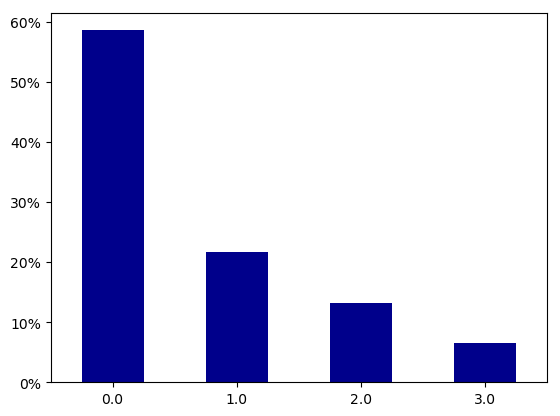

In [9]:
ax = ( 100*df['ca'].value_counts(normalize = True ) ) .plot.bar( color = 'darkblue')
plt.xticks(rotation = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()
# Replace null values in 'ca' column with 0 which is the most frequent values
df['ca'].fillna( 0 , inplace=True)

In [10]:
print( 100 * df['exang'].value_counts(normalize = True ) )

# Fill null values in 'exang' column with False
df['exang'].fillna(False, inplace=True)

False    60.950174
True     39.049826
Name: exang, dtype: float64


In [11]:
print( 100 * df['fbs'].value_counts(normalize = True ) )

# Fill null values in 'exang' column with False
df['fbs'].fillna(False, inplace=True)

False    83.353438
True     16.646562
Name: fbs, dtype: float64


In [12]:


# Check agin for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum().to_frame().T)


Missing values in the dataset:
   id  age  sex  dataset  cp  trestbps  chol  fbs  restecg  thalch  exang  \
0   0    0    0        0   0         0     0    0        0       0      0   

   oldpeak  slope  ca  thal  num  
0        0      0   0     0    0  


<div style="background-color:#f0f8ff; padding: 20px; border: 2px solid #b0c4de; border-radius: 10px;">

### &#128296; <span style="color:#4682b4;">Data Preprocessing</span>

Before we proceed with splitting our data into training and testing sets, we need to clean it up by removing some columns:

- **`id`**: This column is simply an identifier and doesn't provide any useful information for our model, so it will be removed.
- **`dataset`**: This column indicates the place of study. While the place of study could potentially influence other variables (e.g., different methods or metrics used), we will remove it for simplicity.

Here’s how we do it:



In [13]:
# Removing 'id' and 'dataset' columns
df = df.drop(columns=['id', 'dataset'])


## <span style="color:#27ae60">2. Train-Test Split:</span>

<div style="background-color:#f0f8ff; padding: 20px; border: 2px solid #b0c4de; border-radius: 10px;">

### &#128200; <span style="color:#4682b4;">Train-Test Splitting</span>

Splitting your dataset into training and testing sets is a crucial step in developing machine learning models. This practice ensures that the model is evaluated on unseen data, providing a realistic measure of its performance.

While it is often a good practice, and sometimes necessary, to split your data into three sets: training, validation, and testing, for simplicity, we will split the data into just two sets for now:

- **Training Set**: Used to train the model.
- **Testing Set**: Used to evaluate the model's performance.

This approach helps us quickly assess our model while ensuring that we don't test on the same data we train on.


In [14]:

def split_data(df, target_column, test_size=0.2, random_state=42):
    """
    Split the DataFrame into training and testing sets.

    Parameters:
    - df: DataFrame
        The DataFrame containing the data to be split.
    - target_column: str
        The name of the target column.
    - test_size: float, optional (default=0.2)
        The proportion of the dataset to include in the test split.
    - random_state: int, optional (default=42)
        Random seed for reproducibility.

    Returns:
    - X_train: DataFrame
        The features of the training set.
    - X_test: DataFrame
        The features of the testing set.
    - y_train: Series
        The target values of the training set.
    - y_test: Series
        The target values of the testing set.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test


## <span style="color:#27ae60">3. Model Definition:</span>

<div style="background-color:#f0f8ff; padding: 20px; border: 2px solid #b0c4de; border-radius: 10px;">

### &#128295; <span style="color:#4682b4;">Model Definition</span>

Defining the model architecture is a critical step in building a neural network. This involves specifying the layers, activation functions, and other components that make up the model. In our case, we will include:

- **Embedding Layers**: For categorical variables, transforming them into dense vectors.
- **Hidden Layers**: To learn complex patterns from the input features.
- **Batch normalization**: It normalizes the output of a previous layer by 
    subtracting the batch mean and dividing by the batch standard deviation.
- **Output Layer**: For binary classification, predicting the probability of the target class.

    
    
Below is the code that defines our neural network model using PyTorch. The model takes categorical variables and embeds them, then passes them through hidden layers to produce a binary classification output.

In [15]:
class HeartDiseaseModel(nn.Module):
    def __init__(self, categorical_features, categorical_dims, numerical_features, num_classes, hidden_layers=[128, 64]):
        super(HeartDiseaseModel, self).__init__()
        
        # Embedding layers for each categorical feature
        self.embeddings = nn.ModuleDict({
            feature: nn.Embedding(num_categories, min(40, num_categories // 2))
            for feature, num_categories in zip(categorical_features, categorical_dims)
        })
        
        # Calculate the input dimension to the first hidden layer
        input_dim = sum(min(40, num_categories // 2) for num_categories in categorical_dims) + len(numerical_features)
        
        # Define hidden layers and batch normalization layers
        self.hidden_layers = nn.ModuleList()
        self.batch_norms = nn.ModuleList()
        for hidden_dim in hidden_layers:
            self.hidden_layers.append(nn.Linear(input_dim, hidden_dim))
            self.batch_norms.append(nn.BatchNorm1d(hidden_dim))
            input_dim = hidden_dim
        
        # Output layer for multiclass classification
        self.output = nn.Linear(input_dim, num_classes)
    
    def forward(self, x_cat, x_num):
        # Embedding lookup for categorical features
        embeddings = [self.embeddings[feature](x_cat[:, i]) for i, feature in enumerate(self.embeddings.keys())]
        x_cat_embedded = torch.cat(embeddings, dim=1)

        
        # Concatenate embeddings with numerical features
        x = torch.cat([x_cat_embedded, x_num], dim=1)

        
        # Pass through hidden layers with batch normalization
        for layer, batch_norm in zip(self.hidden_layers, self.batch_norms):
            x = F.relu(batch_norm(layer(x)))
            

        
        # Output layer with softmax activation
        x = self.output(x)
        x = F.log_softmax(x, dim=1)
        return x

## <span style="color:#27ae60">4. Model Training:</span>

<div style="background-color:#f0f8ff; padding: 20px; border: 2px solid #00acc1; border-radius: 10px;">

### &#128295; <span style="color:#00796b;">Model Training</span>

Training the model involves optimizing its parameters to minimize the loss function, thus improving its predictive performance. Here’s a breakdown of the steps involved:

1. **Loss Function Selection**: Choose an appropriate loss function for the classification task. For multiclass classification, we use `CrossEntropyLoss`, which combines `log_softmax` and `nll_loss` in one single class.
2. **Optimizer Configuration**: Select an optimizer to adjust the model parameters based on the gradients. We'll use the Adam optimizer, which is a popular choice due to its adaptive learning rate properties.
3. **Iterative Training**: Train the model over several epochs, iteratively adjusting the parameters to minimize the loss. We will also monitor the loss to ensure the model is learning properly.

Below is the code to train the `HeartDiseaseModel` using PyTorch.


In [16]:
def encode_categorical(df, columns):
    """
    Encode categorical columns in a DataFrame using LabelEncoder.

    Parameters:
    - df: DataFrame
        The DataFrame containing the categorical columns to be encoded.
    - columns: list
        A list of column names to be encoded.

    Returns:
    - encoded_df: Tensor
        A Tensor in the same shape as of the original DataFrame with the specified columns encoded.
    """
    # Encode target labels with value between 0 and n_classes-1.
    le = LabelEncoder()

    encoded_df = np.stack( [ le.fit_transform(df[col]) for col in categorical_features ] ,axis = 1)
    return  torch.tensor( encoded_df )

In [17]:
X_train, X_test, y_train, y_test = split_data(df , target_column= 'num')


# Example usage:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
categorical_dims = X_train[categorical_features ].nunique().values  # Number of unique categories for each categorical feature
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak' , 'ca']  # List of numerical features
num_classes = 5  # Number of classes in the target variable

# # Define the model with flexible hidden layers
# model = HeartDiseaseModel(categorical_features, categorical_dims, numerical_features, num_classes, hidden_layers=[128, 64, 32])
# print(model)

# Example data
# Replace these with your actual train and test sets
X_train_cat = encode_categorical(X_train , categorical_features )  # Example categorical data
X_train_num = torch.tensor(X_train[numerical_features].values , dtype=torch.float )  # Example numerical data
y_train = torch.tensor( y_train , dtype=torch.long)  # Example target data

# Define dataset and dataloader
train_dataset = TensorDataset(X_train_cat, X_train_num, y_train)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

# Define the model
#
model = HeartDiseaseModel(   categorical_features, categorical_dims, numerical_features, num_classes, hidden_layers=[128, 64])


# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_cat_batch, X_num_batch, y_batch in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(X_cat_batch, X_num_batch)
        
        # Compute loss
        loss = criterion(outputs, y_batch)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Accumulate loss
        running_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

print("Training complete.")


Epoch [1/100], Loss: 1.3396
Epoch [2/100], Loss: 1.2988
Epoch [3/100], Loss: 1.2955
Epoch [4/100], Loss: 1.2948
Epoch [5/100], Loss: 1.2886
Epoch [6/100], Loss: 1.2874
Epoch [7/100], Loss: 1.2848
Epoch [8/100], Loss: 1.2832
Epoch [9/100], Loss: 1.2667
Epoch [10/100], Loss: 1.2800
Epoch [11/100], Loss: 1.2754
Epoch [12/100], Loss: 1.2808
Epoch [13/100], Loss: 1.2787
Epoch [14/100], Loss: 1.2807
Epoch [15/100], Loss: 1.2889
Epoch [16/100], Loss: 1.2961
Epoch [17/100], Loss: 1.2829
Epoch [18/100], Loss: 1.2607
Epoch [19/100], Loss: 1.2846
Epoch [20/100], Loss: 1.2810
Epoch [21/100], Loss: 1.2679
Epoch [22/100], Loss: 1.2884
Epoch [23/100], Loss: 1.2816
Epoch [24/100], Loss: 1.2604
Epoch [25/100], Loss: 1.2831
Epoch [26/100], Loss: 1.2884
Epoch [27/100], Loss: 1.2916
Epoch [28/100], Loss: 1.2855
Epoch [29/100], Loss: 1.2868
Epoch [30/100], Loss: 1.2761
Epoch [31/100], Loss: 1.2760
Epoch [32/100], Loss: 1.2832
Epoch [33/100], Loss: 1.2718
Epoch [34/100], Loss: 1.2662
Epoch [35/100], Loss: 1

## <span style="color:#27ae60">5. Model Evaluation:</span>

<div style="background-color:#f0f8ff; padding: 20px; border: 2px solid #b0c4de; border-radius: 10px;">

### &#128295; <span style="color:#4682b4;">Model Evaluation</span>

Model evaluation is a pivotal stage in assessing the performance and efficacy of a machine learning model. This multifaceted process involves scrutinizing the model's ability to generalize to unseen data and achieve desired predictive accuracy. Here's a breakdown of the steps involved:

1. **Predictions**: Utilize the trained model to generate predictions on the test dataset.

2. **Performance Metrics**: Calculate various performance metrics, including accuracy, precision, recall, F1-score, and ROC curve, to evaluate the model's effectiveness.

3. **Confusion Matrix**: Construct a confusion matrix to visualize the model's classification results, delineating true positive, true negative, false positive, and false negative predictions.

4. **Visualization**: Employ visualization tools like ROC curves or precision-recall curves to glean insights into the model's performance across different thresholds.

Through meticulous evaluation, we gain invaluable insights into the model's efficacy and its suitability for the classification task at hand.

</div>


In [18]:


# Define a function to evaluate the model
def evaluate_model(model, X_test_cat, X_test_num, y_test):
    model.eval()
    with torch.no_grad():
        # Forward pass
        outputs = model(X_test_cat, X_test_num)
        
        # Get the predicted class by taking the argmax
        _, predicted = torch.max(outputs, 1)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, predicted)
        
        # Print classification report
        class_report = classification_report(y_test, predicted)
        
        # Print confusion matrix
        conf_matrix = confusion_matrix(y_test, predicted)
        
        return accuracy, class_report, conf_matrix

# Prepare the test data
X_test_cat = encode_categorical(X_test, categorical_features)  # Encode categorical features
X_test_num = torch.tensor(X_test[numerical_features].values, dtype=torch.float)  # Convert numerical features to tensor
y_test = torch.tensor(y_test.values, dtype=torch.long)  # Convert target to tensor

# Evaluate the model
accuracy, class_report, conf_matrix = evaluate_model(model, X_test_cat, X_test_num, y_test)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(class_report)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.4565
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.69      0.59        71
           1       0.39      0.58      0.47        59
           2       0.00      0.00      0.00        27
           3       1.00      0.05      0.09        21
           4       0.00      0.00      0.00         6

   micro avg       0.46      0.46      0.46       184
   macro avg       0.38      0.26      0.23       184
weighted avg       0.44      0.46      0.39       184

Confusion Matrix:
[[49 22  0  0  0]
 [25 34  0  0  0]
 [12 15  0  0  0]
 [ 9 11  0  1  0]
 [ 1  5  0  0  0]]


C:\Users\rasou\anaconda_2024\envs\pytorchenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<div style="background-color:#f0f8ff; padding: 20px; border: 2px solid #b0c4de; border-radius: 10px;">

### &#128187; <span style="color:#4682b4;">When to Apply Embeddings for Categorical Variables</span>

Embeddings are a powerful technique to represent categorical variables, especially in scenarios where traditional encoding methods like one-hot encoding fall short. Here's when to consider using embeddings:

1. **High Cardinality**:
   - **Description**: When a categorical variable has a large number of unique categories (high cardinality), one-hot encoding can lead to a high-dimensional feature space.
   - **Issue**: This increases the complexity of the model and can lead to overfitting, inefficiencies, and longer training times.
   - **Embedding Solution**: By using embeddings, you can represent each category as a dense, low-dimensional vector, reducing the dimensionality and capturing meaningful relationships between categories.

2. **Sparse Data**:
   - **Description**: In cases where your dataset is sparse (many categories but few data points per category), one-hot encoding can result in many zero entries.
   - **Issue**: Sparse data can make the model less efficient and harder to train.
   - **Embedding Solution**: Embeddings provide a compact representation, improving model efficiency and training performance.

3. **Complex Relationships**:
   - **Description**: When there are complex relationships or similarities between categories that are not easily captured by one-hot encoding.
   - **Issue**: One-hot encoding treats all categories as equidistant and independent, missing potential similarities.
   - **Embedding Solution**: Embeddings can capture these relationships by learning the similarities between categories during training, as similar categories will have similar vector representations.

4. **Memory Constraints**:
   - **Description**: If you are working with memory-constrained environments, high-dimensional one-hot encoded vectors can be problematic.
   - **Issue**: Large one-hot encoded matrices can consume significant memory.
   - **Embedding Solution**: Embeddings, being lower-dimensional, help in reducing memory usage.

### &#128295; <span style="color:#4682b4;">How to Apply Embeddings in PyTorch</span>

Here's a brief code snippet to illustrate how to apply embeddings for categorical variables in PyTorch:

```python
import torch
import torch.nn as nn

# Assume we have a categorical feature with 10 unique categories
num_categories = 10
embedding_dim = 4  # The dimensionality of the embeddings

# Define an embedding layer
embedding_layer = nn.Embedding(num_categories, embedding_dim)

# Example categorical data (indices of the categories)
categorical_data = torch.LongTensor([1, 3, 5, 7])

# Pass the data through the embedding layer
embedded_data = embedding_layer(categorical_data)

print(embedded_data)
